# Le jeu de Nim par apprentissage
> "Quand une machine apprend à jouer contre son adversaire au fur et à mesure des parties ~~jouées~~ perdues"

- toc:true
- branch: master
- badges: true
- author: Nathalie Weibel
- image : images/allumettes.png
- categories: [jupyter, jeu]

## Les Règles du jeu

**Nombre de joueurs** : 2

**Principe** : on dispose de 8 allumettes. Chaque joueur peut prendre 1, 2 ou 3 allumettes, à tour de rôle. 
Celui qui prend la *dernière* allumette *gagne* la partie. 


![](my_icons/allumettes.png)

### Remarque : 

Le jeu de Nim est cité comme exemple d'activité dans le thème E des programmes de mathématiques du cycle 4. 

On peut par exemple programmer sur Scratch un jeu opposant un adversaire humain à "l'ordinateur" : ici avec 12 "bougies".

![](my_icons/scratch_ecran.png)  

Dans ce contexte, on écrit un algorithme qui décide ce que va jouer la machine.   
L'agorithme attendu peut-être "naïf" : 
![](my_icons/scratch_machine_naif.png)
    ou expert (pour une machine qui ne commence pas la partie) :
![](my_icons/scratch_machine_expert.png)

Différentes versions sont disponibles dans ce studio Scratch : 
https://scratch.mit.edu/studios/28731231/ 

## Objectif : 
L'un des joueurs est un humain, l'autre joueur est "une machine". Celle-ci doit apprendre à jouer contre son adversaire au fur et à mesure des parties jouées.

Cette activité présente ainsi une forme simple d'**apprentissage**, à l'issue duquel la machine aboutit à la stratégie gagnante à ce jeu.

## Version 1 : sans ordinateur

**Matériel** :
- 8 allumettes
- 8 gobelets numérotés de 1 à 8
- 21 jetons : 8 jetons portant le **n°1**, 7 jetons portant le **n°2** et 6 jetons portant le **n°3**.

Chaque gobelet contient 3 jetons numérotés 1, 2, et 3, sauf le gobelet 1 qui ne contient qu'un jeton numéroté 1, et le gobelet 2 qui ne contient que deux jetons numérotés 1 et 2.

![](my_icons/gobelets_pt.png)

**Déroulement**:

Commencer une partie en laissant l'humain jouer en premier. L'humain joue comme il veut...

Lorsque c'est à la machine de jouer, elle :
- compte le nombre d'allumettes restant et prend le gobelet correspondant,
- pioche au hasard un jeton dans le gobelet, le pose sur la table juste devant ce gobelet, et pioche le nombre d'allumettes indiqué par le jeton (1, 2 ou 3).



En fin de partie, quand il n'y a plus d'allumettes, 
- soit la machine a gagné, et dans ce cas elle remet chaque jeton dans le gobelet où elle l'a pioché, 
- soit elle a perdu et dans ce cas elle remet tous les jetons piochés sauf le dernier -- ce choix a permis à l'humain de gagner -- et elle le met de côté.

Au cours des parties successives, il peut arriver qu'un gobelet soit vide. Dans ce cas on retourne le gobelet à l'envers, et à partir de ce moment-là, si l'adversaire laisse un nombre d'allumettes pour lequel le gobelet est vide, la machine abandonne la partie, considère qu'elle a perdu et remet tous les jetons piochés dans leur gobelet sauf le dernier.

**Constats** : 

La machine va souvent perdre au début, mais au fil des parties elle va s'améliorer et finir par suivre une stratégie qui la fera gagner à tous les coups.

## Version 2 : programme Python 

In [1]:
%matplotlib notebook
from random import choice, randint
import matplotlib.pyplot as plt

### Jeu de la machine : 
Les coups possibles au départ pour la machine sont de prendre 1, 2 ou 3 allumettes, s'il en reste au moins 3.

S'il n'en reste que 2, elle peut en prendre 1 ou 2, et s'il n'en reste qu'une, la machine la prend. 

On modélise la situation par un tableau comportant la liste des coups possibles dans chaque cas :

```coups_possibles = [[1], [1, 2]] + [[1,2,3] for i in range(NB_ALLUMETTES - 2)]``` où ```NB_ALLUMETTES``` est le nombre initial d'allumettes, ici 8.

Lorsqu'elle doit jouer, la machine choisit *au hasard* l'un des coups possibles pour le nombre d'allumettes restant. 

Si aucun coup n'est disponible, elle abandonne la partie qu'elle considère comme perdue.

En fin de partie, si la machine a perdu, elle supprime de la liste des coups possibles le dernier coup réalisé.



In [2]:
def jouer_machine(nb_allumettes):
    '''
    - prend en paramètre le nombre d'allumettes restant à jouer
    - renvoie le nombre d'allumettes prises lors du coup joué par la machine
    et un booléen indiquant si la partie est perdue pour la machine
    '''
   
    perdu = False
    if coups_possibles[nb_allumettes - 1] != []:
        coup_joue = choice(coups_possibles[nb_allumettes - 1])
    else :
        perdu = True
        coup_joue = 0
    return (coup_joue, perdu)

### Jeu de l'adversaire:
L'adversaire adopte une stratégie élémentaire :
- S'il reste au plus 3 allumettes, il les prend toutes -- et la partie est perdue pour la machine ; 
- sinon, il choisit aléatoirement, entre 1 et 3, le nombre d'allumettes à prendre.

In [39]:
#version xpert
def jouer_adversaire(nb_allumettes):
    '''
    - prend en paramètre le nombre d'allumettes restant à jouer
    - renvoie le nombre d'allumettes prises lors du coup joué par l'adversaire
    et un booléen indiquant si ce coup a conduit à la perte de la partie 
    pour la machine
    '''
    
    perdu = False
    if nb_allumettes < 4:
        coup_joue = nb_allumettes
        perdu = True
    elif nb_allumettes % 4 != 0:
         coup_joue = nb_allumettes % 4
    else :
        coup_joue = randint(1, 3)
    return (coup_joue, perdu)

### Déroulement du jeu

In [32]:
NB_ALLUMETTES = 8

In [5]:
def jouer_partie(n):
    ''' 
    simule le déroulement de n parties successives, en faisant toujours 
    commencer l'adversaire de la machine
    et renvoie la liste des rangs des parties perdues
    '''
    
    parties_perdues = []
    
    for i in range(n):
        perdu = False # perdu prend la valeur True lorsque la machine perd la partie
        allumettes = [NB_ALLUMETTES] # contient les valeurs successives au 
        # cours d'une partie du nombre d'allumettes restantes 
       
        while not perdu and allumettes[-1] > 0 :
            #l'adversaire joue 
            nb_allumettes, perdu = jouer_adversaire(allumettes[-1])
            allumettes.append(allumettes[-1] - nb_allumettes)
            
            if perdu : 
                # le dernier coup de la machine a permis à l'adversaire de 
                # gagner : on supprime le coup correspondant de la 
                # liste des coups possibles
                coups_possibles[allumettes[-3] - 1].remove(allumettes[-3] - allumettes[-2])
               
            else :
                # la machine joue
                nb_allumettes, perdu = jouer_machine(allumettes[-1])
                allumettes.append(allumettes[-1] - nb_allumettes)
                
                if perdu :  
                    #le précédent coup de la machine a conduit à sa défaite : 
                    # on supprime le coup correspondant de la liste des coups possibles
                    coups_possibles[allumettes[-4] - 1].remove(allumettes[-4] - allumettes[-3])
                    
        if perdu :
            parties_perdues.append(i)
           
    return (parties_perdues)
  
  

## Exemples de situations possibles au bout d'une partie 

### allumettes = [8, 7, 4, 2, 1, 0]   
on supprime le jeton 1 du gobelet 2  
`coups_possibles = [[1], [2], [1, 2, 3], [1, 2, 3], [1, 2, 3], [1, 2, 3], [1, 2, 3], [1, 2, 3]]`

### allumettes = [8, 6, 5, 3, 2, 0] 
on supprime le jeton 1 du gobelet 3  
`coups_possibles = [[1], [1, 2], [2, 3], [1, 2, 3], [1, 2, 3], [1, 2, 3], [1, 2, 3], [1, 2, 3]]`

### allumettes = [8, 7, 5, 4, 1, 0]

on supprime le jeton 3 du gobelet 4  
`coups_possibles = [[1], [1, 2], [1, 2, 3], [1, 2], [1, 2, 3], [1, 2, 3], [1, 2, 3], [1, 2, 3]]`

### allumettes = [8, 5, 2, 0]

on supprime le jeton 3 du gobelet 5  
`coups_possibles = [[1], [1, 2], [1, 2, 3], [1, 2, 3], [1, 2], [1, 2, 3], [1, 2, 3], [1, 2, 3]]`

### allumettes = [8, 6, 3, 0]

on supprime le jeton 3 du gobelet 6  
`coups_possibles = [[1], [1, 2], [1, 2, 3], [1, 2, 3], [1, 2, 3], [1, 2], [1, 2, 3], [1, 2, 3]]`

### allumettes = [8, 6, 5, 3, 0]

la machine a gagné !

`coups_possibles = [[1], [1, 2], [1, 2, 3], [1, 2, 3], [1, 2, 3], [1, 2, 3], [1, 2, 3], [1, 2, 3]]`


## Exemples de situations nécessitant plus d'une partie
### allumettes = [8, 6, 5, 4, 4]  
avec `coups_possibles[4] = []`: on supprime le jeton 1 du gobelet 6

### allumettes = [8, 7, 6, 4, 4]
avec `coups_possibles[4] = []` : on supprime le jeton 1 du gobelet 7


### Simulation d'un échantillon de parties jouées, affichage des rangs des parties perdues

In [40]:
coups_possibles = [[1], [1, 2]] + [[1,2,3] for i in range(NB_ALLUMETTES - 2)]
parties_perdues = jouer_partie(300)
print("parties perdues : ", len(parties_perdues), parties_perdues)

parties perdues :  12 [0, 1, 2, 5, 10, 12, 13, 15, 17, 18, 21, 24]


In [41]:
print(coups_possibles)

[[1], [2], [3], [], [1], [2], [3], [1, 2, 3]]


## Constat
La machine a appris à gagner à ce jeu : elle ignorait comment faire au début et perdait fréquemment. Elle a appris de chaque partie perdue et obtient une stratégie parfaite. Les parties jouées, réelles (version 1) ou simulées (version 2), sont les données sur lesquelles s’appuie son apprentissage.
Elle illustre bien que la machine peut apprendre une stratégie que l’humain ne connaissait pas au départ, et qui lui aurait demandé (à l’humain) de l’intelligence pour la découvrir.

### Simulation d'un nombre variable d'échantillons de parties jouées, affichage des rangs des dernières parties perdues

In [42]:
def simulation(nb_echantillons, taille_echantillon):
    global coups_possibles
    dernieres_perdues = []
    
    for i in range(nb_echantillons):
        coups_possibles = [[1], [1, 2]] + [[1,2,3] for i in range(NB_ALLUMETTES - 2)]
        parties_perdues = jouer_partie(taille_echantillon)
        if len(parties_perdues) == 12:
            dernieres_perdues.append(parties_perdues[-1])
        else:
            dernieres_perdues.append(300)
    return dernieres_perdues

In [43]:
print(simulation(25, 300))

[15, 28, 23, 30, 19, 26, 24, 16, 22, 21, 19, 16, 24, 20, 26, 20, 24, 23, 30, 20, 41, 20, 18, 17, 22]


In [44]:
def representation_graphique(n):
    dernieres_perdues = simulation(n, 400)
    plt.scatter(list(range(n)), dernieres_perdues, s = 8, c = 'r')
    moyenne = sum(dernieres_perdues)/len(dernieres_perdues)
    plt.axhline(moyenne)
    plt.title('Rang de la dernière partie perdue')
    plt.xlabel("numéro de l'échantillon")
    plt.ylabel('rang de la dernière partie perdue')
    plt.show()

<IPython.core.display.Javascript object>


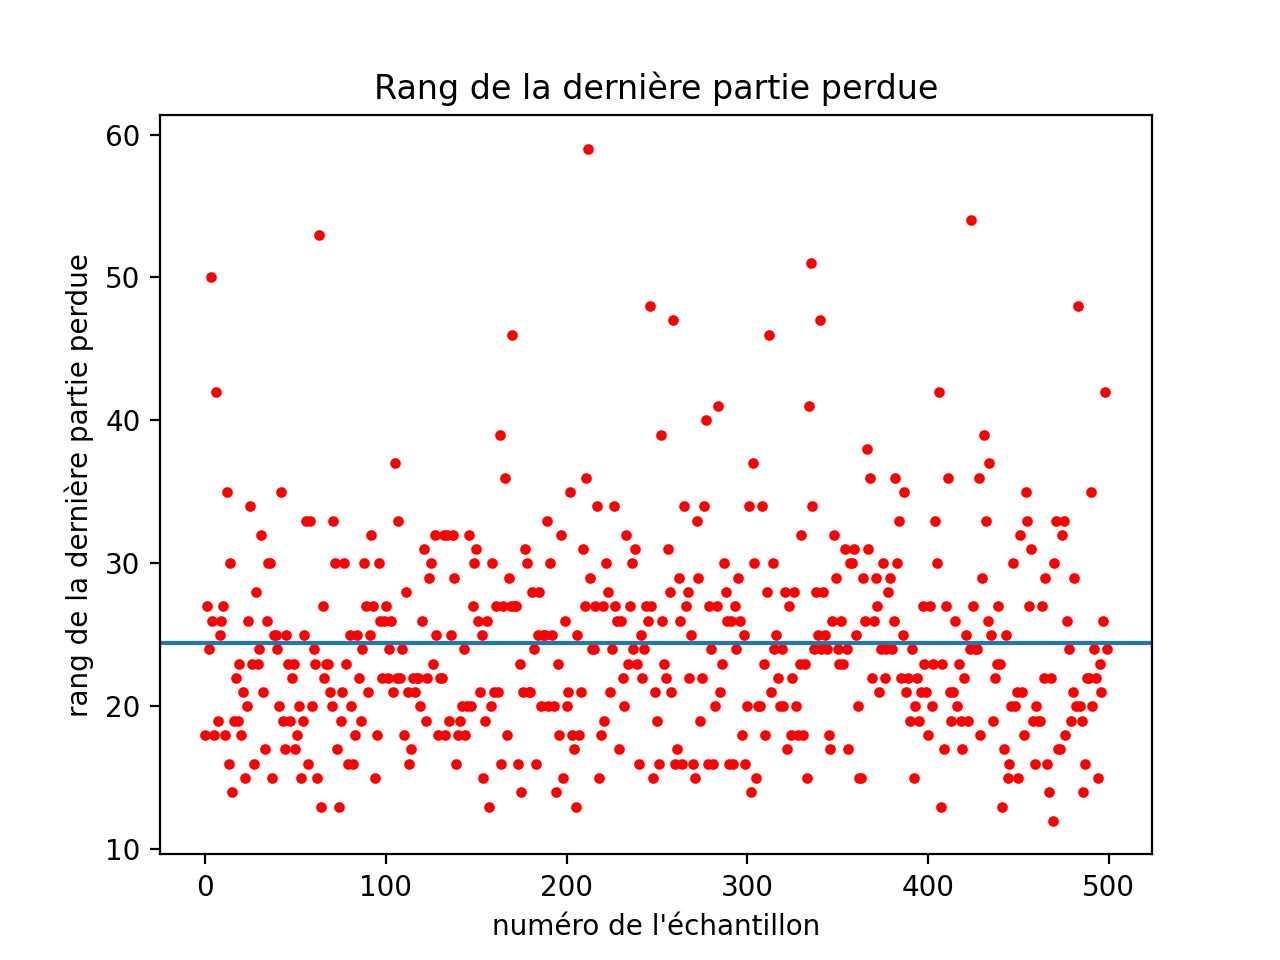

In [46]:
representation_graphique(500)

**Sources** :
- [Quand une machine apprend à jouer au jeu de Nim (Marie Duflot)](https://members.loria.fr/MDuflot/files/med/IAnim.html), ([CC BY SA](https://creativecommons.org/licenses/by-nc-sa/4.0/deed.fr))


**Pour aller plus loin** : 
- [Une machine en boites d'alumettes qui apprend à jouer au morpion, Lisa Rougetet](http://images.math.cnrs.fr/Une-machine-en-boites-d-allumettes-qui-apprend-a-jouer-au-Morpion.html)
- [Un jeu pour comprendre l'apprentissage automatique,  Florent Madelaine & Malika More](http://www.tangente-education.com/article.php?art=4076&dos=158)
- [La machine qui apprend à (bien) jouer toute seule, Eric Duchêne et Aline Parreau](https://projet.liris.cnrs.fr/lirismed/index.php?id=la-machine-qui-apprend-a-jouer-toute-seule)

![](my_icons/CC-BY-SA_icon.png)